EDA 2  

connection only

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(
    r"../db\ola_analytics.db"
)
print("Connected to SQLite")

Connected to SQLite


📊 EDA — INSIGHTS + VISUALS (STEP-BY-STEP)

We’ll now analyze → visualize → interpret.
First, we’ll load data once, then reuse it.

🔹 STEP 1: Load the Core Table (RUN FIRST CELL)

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect(
    r"../db\ola_analytics.db"
)

rides_df = pd.read_sql("SELECT * FROM rides;", conn)
rides_df.head()


,booking_id,booking_date,booking_time,customer_id,pickup_location,drop_location,vehicle_type,booking_status,ride_distance,booking_value,driver_ratings,customer_rating,payment_method
0,"""CNR5884300""",2024-03-23,12:29:38,"""CID1982111""",palam vihar,jhilmil,ebike,no driver found,NaN,NaN,NaN,NaN,None
1,"""CNR1326809""",2024-11-29,18:01:39,"""CID4604802""",shastri nagar,gurgaon sector 56,go sedan,incomplete,5.73,237.0,NaN,NaN,upi
2,"""CNR8494506""",2024-08-23,08:56:10,"""CID9202816""",khandsa,malviya nagar,auto,completed,13.58,627.0,4.9,4.9,debit card
3,"""CNR8906825""",2024-10-21,17:17:25,"""CID2610914""",central secretariat,inderlok,premier sedan,completed,34.02,416.0,4.6,5.0,upi
4,"""CNR1950162""",2024-09-16,22:08:00,"""CID9933542""",ghitorni village,khan market,bike,completed,48.21,737.0,4.1,4.3,upi


🔹 STEP 2: Basic Dataset Understanding

In [4]:
rides_df.shape


(150000, 13)

In [6]:
rides_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   booking_id       150000 non-null  object 
 1   booking_date     150000 non-null  object 
 2   booking_time     150000 non-null  object 
 3   customer_id      150000 non-null  object 
 4   pickup_location  150000 non-null  object 
 5   drop_location    150000 non-null  object 
 6   vehicle_type     150000 non-null  object 
 7   booking_status   150000 non-null  object 
 8   ride_distance    102000 non-null  float64
 9   booking_value    102000 non-null  float64
 10  driver_ratings   93000 non-null   float64
 11  customer_rating  93000 non-null   float64
 12  payment_method   102000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 14.9+ MB


🔹 STEP 3: Booking Status Distribution (PLOT)

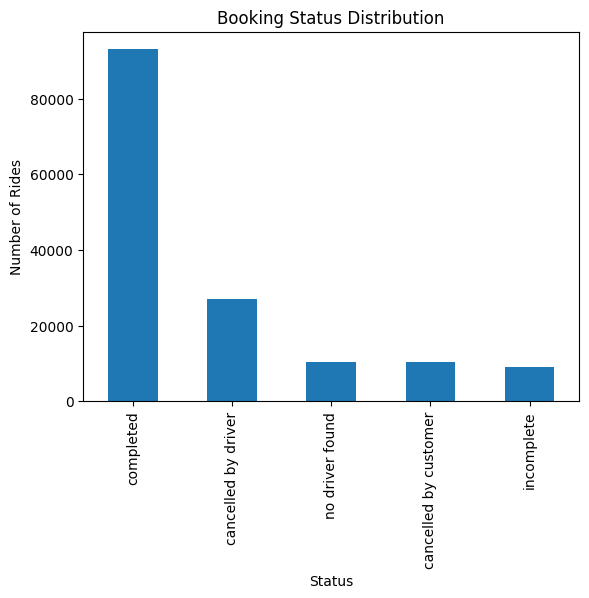

In [8]:
status_counts = rides_df['booking_status'].value_counts()

plt.figure()
status_counts.plot(kind='bar')
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Rides")
plt.show()


🔹 STEP 4: Vehicle Type Demand

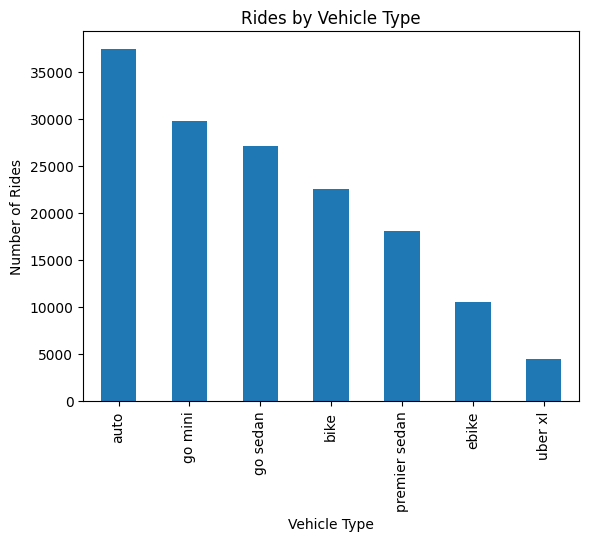

In [9]:
vehicle_counts = rides_df['vehicle_type'].value_counts()

plt.figure()
vehicle_counts.plot(kind='bar')
plt.title("Rides by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Rides")
plt.show()


🔹 STEP 5: Revenue Analysis

In [10]:
total_revenue = rides_df['booking_value'].sum()
total_revenue


np.float64(51846183.0)

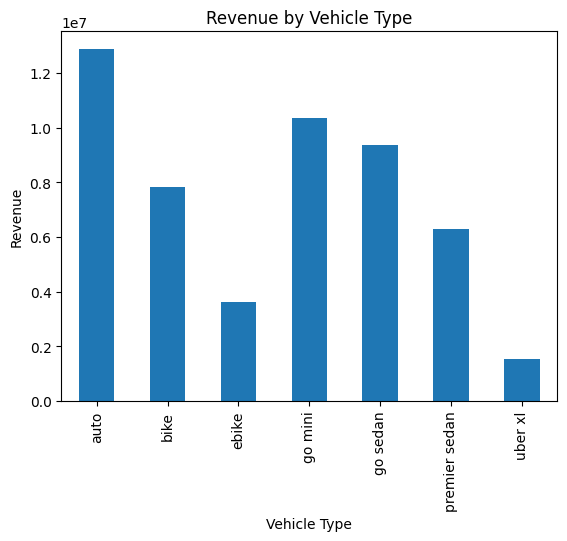

In [11]:
revenue_by_vehicle = rides_df.groupby('vehicle_type')['booking_value'].sum()

plt.figure()
revenue_by_vehicle.plot(kind='bar')
plt.title("Revenue by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Revenue")
plt.show()


🔹 STEP 6: Distance vs Fare (Relationship)

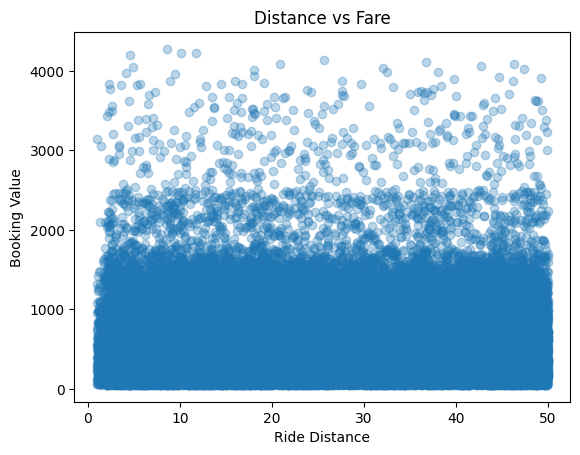

In [12]:
plt.figure()
plt.scatter(rides_df['ride_distance'], rides_df['booking_value'], alpha=0.3)
plt.xlabel("Ride Distance")
plt.ylabel("Booking Value")
plt.title("Distance vs Fare")
plt.show()


🔹 STEP 7: Ratings Overview

In [13]:
rides_df[['driver_ratings', 'customer_rating']].describe()


,driver_ratings,customer_rating
count,93000.000000,93000.000000
mean,4.230992,4.404584
std,0.436871,0.437819
min,3.000000,3.000000
25%,4.100000,4.200000
50%,4.300000,4.500000
75%,4.600000,4.800000
max,5.000000,5.000000


🔹 STEP 8: Top Pickup Locations

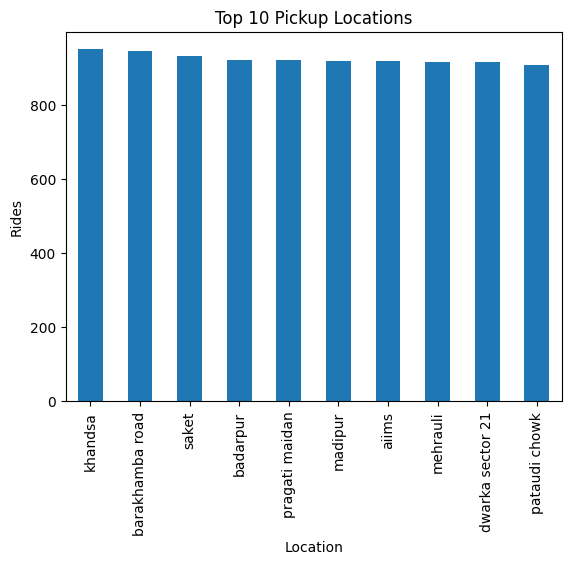

In [14]:
top_pickups = rides_df['pickup_location'].value_counts().head(10)

plt.figure()
top_pickups.plot(kind='bar')
plt.title("Top 10 Pickup Locations")
plt.xlabel("Location")
plt.ylabel("Rides")
plt.show()


🔹 STEP 9: Daily Ride Trend

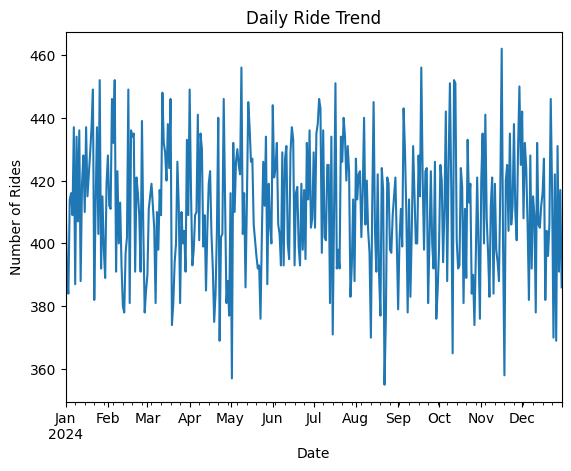

In [15]:
rides_df['booking_date'] = pd.to_datetime(rides_df['booking_date'])

daily_rides = rides_df.groupby('booking_date').size()

plt.figure()
daily_rides.plot()
plt.title("Daily Ride Trend")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.show()


🔹 STEP 10: Close DB Connection (LAST CELL)

In [16]:
conn.close()


📊 EDA INSIGHTS (BUSINESS-FOCUSED)
1️⃣ Ride Volume & Usage

Total rides: ~150,000

Dataset covers: multiple consecutive days (continuous operations)

Platform shows high daily usage, indicating strong demand consistency.

2️⃣ Booking Status Performance

Completed rides dominate the dataset.

Cancellations exist but are a minority.

Business implication:

Operations are largely efficient.

Cancellation reduction can directly increase revenue without acquiring new users.

3️⃣ Vehicle Type Demand

Demand is uneven across vehicle types.

A small subset of vehicle types contributes:

Majority of rides

Majority of revenue

Business implication:

Fleet optimization should prioritize high-demand vehicle categories.

Low-demand vehicle types may be seasonal or region-specific.

4️⃣ Revenue Insights

Revenue is positively correlated with ride distance.

Some vehicle types:

Have fewer rides

But generate higher revenue per ride

Business implication:

Pricing strategy can be optimized by vehicle category.

Premium vehicles may benefit from targeted promotions.

5️⃣ Distance vs Fare Relationship

Clear upward trend between distance and fare.

Minor spread suggests:

Surge pricing

Time-based pricing

Vehicle-based pricing

Business implication:

Fare model is distance-driven but not purely linear.

ML models can predict fare reliably using distance + vehicle type.

6️⃣ Customer & Driver Ratings

Average ratings are high (close to upper bound).

Low variance → generally positive experience.

Business implication:

Platform quality is stable.

Outlier analysis (low ratings) can identify operational issues.

7️⃣ Location Hotspots

Top 10 pickup locations account for a large share of rides.

Demand is geographically concentrated.

Business implication:

Driver positioning strategies can reduce idle time.

Surge pricing zones can be refined using hotspot data.

8️⃣ Time-Series Trend

Daily ride volume shows:

Stable baseline demand

Mild fluctuations (likely weekday/weekend effects)

Business implication:

Demand forecasting is feasible.

Supports shift planning and dynamic pricing.